## Lab 2 – Datarensning (ETL) för Smart Home IoT – “dirty version”
# Mål med labben

I denna labb ska du:

* Läsa in ett smutsigt IoT-dataset för

* smarta hem.

* Undersöka datakvalitet:

* saknade värden

* dubbletter

* orimliga värden (outliers)

* Rensa och standardisera datan    (Transform i ETL).

Slutligen Spara en ren version av datan för Lab 3 & 4 (Load).

Steg 0 – Importera bibliotek

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Steg 1 – Läs in smutsig data

För att läsa in och spara datafiler, finns det två sätt via Git eller Google driver. Förlj länken nedan där har jag förklarat hur man gör beroende på vilken väg ni väljer
https://www.notion.so/Lab2-Datarensning-2aa9de1f0d8380ab9e64e60eb26c7656?source=copy_link

In [3]:
# läsa in den smutsiga datan, sparade från lab 1


df = pd.read_csv('raw_energydata.csv')

In [4]:
print(f"  • {200} saknade värden (NaN)")
print(f"  • {150} dubbletter")
print(f"  • {100} extrema värden (outliers)")
print(f"\n Nu ska vi lära oss hitta och fixa dessa problem!")

  • 200 saknade värden (NaN)
  • 150 dubbletter
  • 100 extrema värden (outliers)

 Nu ska vi lära oss hitta och fixa dessa problem!


In [6]:
# Visa de första raderna
df.head()

,Datum_Tid,Vitvaror_Energi_Wh,Belysning_Wh,Temp_Kök_C,Fukt_Kök_Procent,Temp_Vardagsrum_C,Fukt_Vardagsrum_Procent,Temp_Tvättstuga_C,Fukt_Tvättstuga_Procent,Temp_Kontor_C,...,Temp_Föräldrarum_C,Fukt_Föräldrarum_Procent,Temp_Utomhus_Väderstation_C,Lufttryck_mmHg,Fukt_Utomhus_Väderstation_Procent,Vindhastighet_m_per_s,Sikt_km,Daggpunkt_C,Slump_Variabel_1,Slump_Variabel_2
0,2016-01-11 17:00:00,60.0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Steg 2 – Överblick av datasetet

In [7]:
df.columns.size

29

In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Datum_Tid                          19885 non-null  object 
 1   Vitvaror_Energi_Wh                 19785 non-null  float64
 2   Belysning_Wh                       19885 non-null  int64  
 3   Temp_Kök_C                         19686 non-null  float64
 4   Fukt_Kök_Procent                   19885 non-null  float64
 5   Temp_Vardagsrum_C                  19885 non-null  float64
 6   Fukt_Vardagsrum_Procent            19885 non-null  float64
 7   Temp_Tvättstuga_C                  19885 non-null  float64
 8   Fukt_Tvättstuga_Procent            19885 non-null  float64
 9   Temp_Kontor_C                      19885 non-null  float64
 10  Fukt_Kontor_Procent                19885 non-null  float64
 11  Temp_Badrum_C                      19885 non-null  flo

In [9]:
df.describe()

,Vitvaror_Energi_Wh,Belysning_Wh,Temp_Kök_C,Fukt_Kök_Procent,Temp_Vardagsrum_C,Fukt_Vardagsrum_Procent,Temp_Tvättstuga_C,Fukt_Tvättstuga_Procent,Temp_Kontor_C,Fukt_Kontor_Procent,...,Temp_Föräldrarum_C,Fukt_Föräldrarum_Procent,Temp_Utomhus_Väderstation_C,Lufttryck_mmHg,Fukt_Utomhus_Väderstation_Procent,Vindhastighet_m_per_s,Sikt_km,Daggpunkt_C,Slump_Variabel_1,Slump_Variabel_2
count,19785.000000,19885.000000,19686.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,...,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000,19885.000000
mean,96.860753,3.805884,22.012731,40.261982,20.340591,40.424173,22.267470,39.244440,20.855033,39.028223,...,19.485361,41.551259,7.410173,755.522773,79.757137,4.040734,38.317132,3.760583,24.993364,24.993364
std,104.552636,7.940671,6.654636,3.979472,2.191868,4.068126,2.004974,3.257156,2.042264,4.343742,...,2.013894,4.153895,5.315337,7.396717,14.897493,2.452617,11.792417,4.193553,14.501372,14.501372
min,-500.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.525000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.504440,12.504440
50%,60.000000,0.000000,21.600000,39.663333,20.000000,40.500000,22.100000,38.530000,20.663333,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.911830,24.911830
75%,100.000000,0.000000,22.633333,43.090000,21.500000,43.266667,23.290000,41.766667,22.100000,42.163333,...,20.600000,44.342857,10.400000,760.933333,91.666667,5.500000,40.000000,6.566667,37.596251,37.596251
max,1080.000000,70.000000,150.000000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Steg 3 – Kontrollera datakvalitet

4.1 Saknade värden

In [10]:
print("Saknade värden per kolumn")
display(df.isna().sum())  # isna().sum() räknar hur många NaN finns det i varje kolumn

Saknade värden per kolumn


Datum_Tid                              0
Vitvaror_Energi_Wh                   100
Belysning_Wh                           0
Temp_Kök_C                           199
Fukt_Kök_Procent                       0
Temp_Vardagsrum_C                      0
Fukt_Vardagsrum_Procent                0
Temp_Tvättstuga_C                      0
Fukt_Tvättstuga_Procent                0
Temp_Kontor_C                          0
Fukt_Kontor_Procent                    0
Temp_Badrum_C                          0
Fukt_Badrum_Procent                   50
Temp_Utomhus_Norr_C                    0
Fukt_Utomhus_Norr_Procent              0
Temp_Strykrum_C                        0
Fukt_Strykrum_Procent                  0
Temp_Tonårsrum_C                       0
Fukt_Tonårsrum_Procent                 0
Temp_Föräldrarum_C                     0
Fukt_Föräldrarum_Procent               0
Temp_Utomhus_Väderstation_C            0
Lufttryck_mmHg                         0
Fukt_Utomhus_Väderstation_Procent      0
Vindhastighet_m_

4.2 Dubbletter

In [11]:
print("Antal dubbletter (hela rader som är kopior):", 
df.duplicated().sum())
dups = df[df.duplicated()]

print("Dubbletter")
dups.head(20)


Antal dubbletter (hela rader som är kopior): 149
Dubbletter


,Datum_Tid,Vitvaror_Energi_Wh,Belysning_Wh,Temp_Kök_C,Fukt_Kök_Procent,Temp_Vardagsrum_C,Fukt_Vardagsrum_Procent,Temp_Tvättstuga_C,Fukt_Tvättstuga_Procent,Temp_Kontor_C,...,Temp_Föräldrarum_C,Fukt_Föräldrarum_Procent,Temp_Utomhus_Väderstation_C,Lufttryck_mmHg,Fukt_Utomhus_Väderstation_Procent,Vindhastighet_m_per_s,Sikt_km,Daggpunkt_C,Slump_Variabel_1,Slump_Variabel_2
19735,2016-03-14 01:40:00,40.0,0,NaN,35.400000,17.760000,39.163333,20.290000,36.900000,19.760000,...,19.290000,39.030000,1.766667,768.900000,88.333333,2.333333,63.000000,0.000000,25.622221,25.622221
19736,2016-01-30 20:00:00,90.0,10,NaN,53.100000,21.290000,45.360000,21.633333,49.226667,20.533333,...,16.290000,44.200000,2.700000,754.600000,90.000000,3.000000,27.000000,1.200000,23.474485,23.474485
19737,2016-03-15 03:00:00,50.0,0,NaN,35.500000,17.633333,40.530000,21.666667,35.200000,20.290000,...,19.390000,38.290000,0.200000,766.200000,83.000000,2.000000,65.000000,-2.400000,0.143368,0.143368
19738,2016-04-20 10:10:00,50.0,0,NaN,41.033333,23.890000,34.840000,22.033333,36.933333,22.390000,...,20.290000,38.560000,8.850000,767.800000,70.833333,5.166667,40.000000,3.716667,10.293451,10.293451
19739,2016-03-13 08:10:00,70.0,0,NaN,35.126667,16.463333,40.126667,20.000000,36.400000,19.260000,...,19.000000,40.700000,-0.466667,769.650000,93.333333,4.000000,48.833333,-1.450000,10.754162,10.754162
19740,2016-03-22 19:30:00,120.0,10,NaN,44.696667,20.890000,40.590000,22.290000,38.260000,21.200000,...,19.790000,39.290000,7.550000,756.100000,78.500000,3.500000,26.000000,3.950000,20.213770,20.213770
19741,2016-03-09 16:20:00,120.0,10,NaN,36.700000,16.890000,39.900000,19.790000,36.626667,20.360000,...,17.500000,36.790000,6.566667,745.333333,64.333333,5.333333,40.000000,0.233333,21.983116,21.983116
19742,2016-04-30 18:10:00,70.0,0,NaN,40.466667,20.600000,40.400000,24.200000,37.326667,20.200000,...,19.426667,37.730000,9.683333,760.666667,67.000000,6.000000,40.000000,3.700000,17.161621,17.161621
19743,2016-04-12 03:20:00,50.0,0,NaN,43.090000,19.500000,44.730000,23.500000,40.790000,22.000000,...,20.823333,44.126667,7.600000,751.533333,88.666667,2.666667,40.000000,5.800000,18.311093,18.311093
19744,2016-03-05 21:10:00,70.0,20,NaN,37.200000,17.730000,39.163333,20.290000,36.590000,18.100000,...,18.033333,35.500000,3.166667,744.133333,88.333333,3.000000,22.500000,1.366667,21.056554,21.056554


In [12]:
dups['Vitvaror_Energi_Wh'] # om man inte vilka ex home id som är duplicated

19735    40.0
19736    90.0
19737    50.0
19738    50.0
19739    70.0
         ... 
19880     NaN
19881     NaN
19882     NaN
19883     NaN
19884     NaN
Name: Vitvaror_Energi_Wh, Length: 149, dtype: float64

4.3 Orimliga värden (business rules)

In [13]:
# kollar först outliers för energyforbrukning
energy_outliners = df[(df['Vitvaror_Energi_Wh'] < 0) |
                     (df['Vitvaror_Energi_Wh'] > 500)]
print("Antal orimliga energivärden:", len(energy_outliners))
energy_outliners

Antal orimliga energivärden: 313


,Datum_Tid,Vitvaror_Energi_Wh,Belysning_Wh,Temp_Kök_C,Fukt_Kök_Procent,Temp_Vardagsrum_C,Fukt_Vardagsrum_Procent,Temp_Tvättstuga_C,Fukt_Tvättstuga_Procent,Temp_Kontor_C,...,Temp_Föräldrarum_C,Fukt_Föräldrarum_Procent,Temp_Utomhus_Väderstation_C,Lufttryck_mmHg,Fukt_Utomhus_Väderstation_Procent,Vindhastighet_m_per_s,Sikt_km,Daggpunkt_C,Slump_Variabel_1,Slump_Variabel_2
11,2016-01-11 18:50:00,580.0,60,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.000000,...,16.890000,45.290000,5.983333,734.433333,91.166667,5.833333,40.000000,4.616667,8.827838,8.827838
314,2016-01-13 21:20:00,520.0,0,19.600000,41.530000,19.133333,40.900000,19.133333,42.860000,19.633333,...,16.700000,40.090000,2.900000,756.733333,88.666667,5.000000,36.333333,1.233333,13.360604,13.360604
392,2016-01-14 10:20:00,550.0,10,18.700000,43.433333,18.390000,42.090000,19.260000,42.526667,18.700000,...,16.890000,46.526667,2.033333,748.766667,94.333333,5.333333,40.000000,1.233333,46.261497,46.261497
393,2016-01-14 10:30:00,690.0,10,18.790000,43.766667,18.500000,42.060000,19.320000,43.145000,18.700000,...,16.890000,46.400000,2.100000,748.800000,94.000000,5.000000,40.000000,1.250000,25.351780,25.351780
394,2016-01-14 10:40:00,620.0,10,18.790000,43.693333,18.566667,41.726667,19.693333,44.860000,18.760000,...,16.890000,46.260000,2.166667,748.833333,93.666667,4.666667,40.000000,1.266667,7.742551,7.742551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19586,2016-05-26 17:20:00,600.0,0,24.390000,44.066667,25.264286,37.528571,26.972500,39.042500,24.700000,...,22.700000,43.590000,20.833333,756.000000,45.333333,2.000000,40.000000,8.466667,9.560651,9.560651
19587,2016-05-26 17:30:00,520.0,0,24.390000,43.366667,25.060000,37.120000,27.166667,39.126667,24.666667,...,22.700000,43.590000,20.900000,755.950000,45.500000,2.000000,40.000000,8.600000,14.604373,14.604373
19684,2016-05-27 09:40:00,580.0,0,23.633333,47.226667,24.814000,43.472000,26.166667,40.500000,24.500000,...,22.890000,46.433333,15.900000,756.166667,79.333333,1.666667,61.000000,12.266667,27.740214,27.740214
19685,2016-05-27 09:50:00,660.0,0,23.760000,47.693333,25.497143,42.595714,26.033333,40.693333,24.500000,...,22.890000,46.290000,16.100000,756.183333,78.666667,1.333333,61.000000,12.333333,4.105907,4.105907


In [14]:
# kollar outliers för temp
temp_outliers = df[(df['Temp_Kök_C'] < -10) |
                   (df['Temp_Kök_C'] > 35)]
print("Antal orimliga temperaturer:", len(temp_outliers))
temp_outliers

Antal orimliga temperaturer: 50


,Datum_Tid,Vitvaror_Energi_Wh,Belysning_Wh,Temp_Kök_C,Fukt_Kök_Procent,Temp_Vardagsrum_C,Fukt_Vardagsrum_Procent,Temp_Tvättstuga_C,Fukt_Tvättstuga_Procent,Temp_Kontor_C,...,Temp_Föräldrarum_C,Fukt_Föräldrarum_Procent,Temp_Utomhus_Väderstation_C,Lufttryck_mmHg,Fukt_Utomhus_Väderstation_Procent,Vindhastighet_m_per_s,Sikt_km,Daggpunkt_C,Slump_Variabel_1,Slump_Variabel_2
1079,2016-01-19 04:50:00,10.0,0,150.0,39.030000,17.790000,39.500000,19.700000,40.567500,18.600000,...,16.790000,41.290000,-4.100000,756.283333,89.000000,1.000000,64.000000,-5.700000,19.337233,19.337233
1126,2016-01-19 12:40:00,40.0,0,150.0,40.200000,17.790000,40.466667,19.000000,39.900000,18.290000,...,16.700000,38.900000,-0.533333,757.600000,67.666667,1.000000,21.333333,-5.833333,13.922001,13.922001
1653,2016-01-23 04:30:00,20.0,0,150.0,42.700000,16.390000,42.863333,17.760000,40.900000,15.390000,...,15.190000,41.900000,5.050000,766.100000,99.500000,3.500000,7.000000,5.000000,16.417093,16.417093
2265,2016-01-27 10:30:00,20.0,0,150.0,46.200000,19.100000,45.400000,19.963333,45.000000,18.700000,...,17.166667,48.966667,10.000000,757.550000,89.000000,10.000000,37.000000,8.250000,25.174097,25.174097
2693,2016-01-30 09:50:00,60.0,0,150.0,46.090000,18.390000,45.400000,19.600000,44.400000,16.463333,...,16.390000,49.090000,8.516667,752.900000,91.500000,11.166667,23.333333,7.150000,16.899116,16.899116
2872,2016-01-31 15:40:00,90.0,0,150.0,42.000000,21.600000,40.826667,21.200000,43.400000,19.390000,...,16.790000,46.590000,7.933333,750.966667,97.000000,7.000000,34.333333,7.500000,49.270107,49.270107
2980,2016-02-01 09:40:00,140.0,20,150.0,47.290000,20.463333,46.500000,21.463333,46.400000,19.730000,...,17.790000,51.826667,11.066667,759.900000,78.333333,8.333333,22.666667,7.400000,33.003267,33.003267
3000,2016-02-01 13:00:00,80.0,10,150.0,45.790000,22.133333,43.260000,23.260000,47.063333,19.600000,...,17.700000,49.663333,11.300000,760.000000,76.000000,10.000000,40.000000,7.200000,40.117477,40.117477
3030,2016-02-01 18:00:00,120.0,20,150.0,48.996667,23.200000,44.195000,25.166667,45.363333,19.730000,...,17.790000,49.400000,11.400000,760.000000,78.000000,9.000000,40.000000,7.700000,20.351322,20.351322
3150,2016-02-02 14:00:00,70.0,0,150.0,50.393333,21.200000,46.163333,22.463333,46.060000,20.790000,...,18.200000,49.790000,8.200000,756.100000,95.000000,5.000000,23.000000,7.500000,14.914068,14.914068


Steg 5 – Visualisera problemet (outlier-spik)

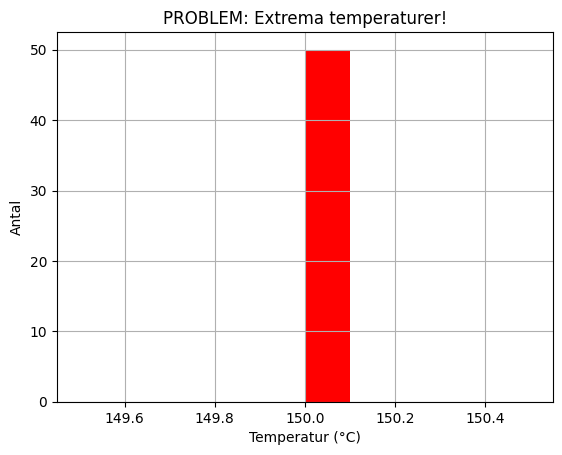

In [15]:
# Graf 1: Visa BARA de extrema temperaturerna (över 50°C)
extrema_temp = df[df['Temp_Kök_C'] > 35]['Temp_Kök_C']
extrema_temp.hist(color='red')
plt.title('PROBLEM: Extrema temperaturer!')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Antal')
plt.show()

In [16]:
print(" GRAF 1 VISAR:")
print(f"• {len(extrema_temp)} temperaturer vid {extrema_temp.iloc[0]:.0f}°C")
print("• Det är för varmt för ett kök! Huset skulle brinna!")

 GRAF 1 VISAR:
• 50 temperaturer vid 150°C
• Det är för varmt för ett kök! Huset skulle brinna!


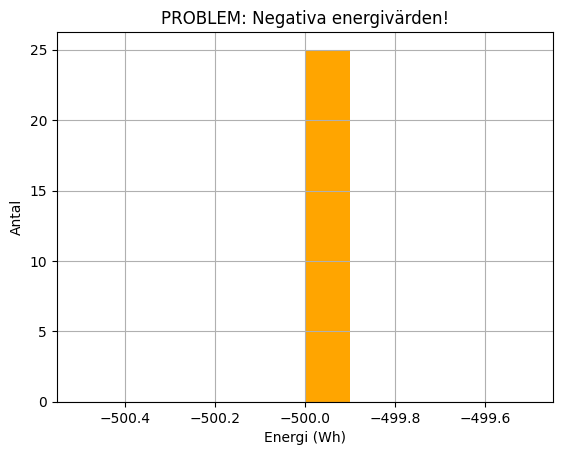

In [17]:

# Graf 2: Visa BARA de negativa energivärdena  
negativa_energi = df[df['Vitvaror_Energi_Wh'] < 0]['Vitvaror_Energi_Wh']
negativa_energi.hist(color='orange')
plt.title('PROBLEM: Negativa energivärden!')
plt.xlabel('Energi (Wh)')  
plt.ylabel('Antal')
plt.show()

In [18]:
print(" GRAF 2 VISAR:")
print(f"• {len(negativa_energi)} negativa energivärden vid {negativa_energi.iloc[0]:.0f} Wh")
print("• Vitvaror kan inte ge tillbaka energi - det är omöjligt!")


 GRAF 2 VISAR:
• 25 negativa energivärden vid -500 Wh
• Vitvaror kan inte ge tillbaka energi - det är omöjligt!


Steg 6 – Rensa datan

In [19]:
# Låt oss först kolla vilka extrema värden vi har
print("🔍 EXTREMA VÄRDEN I DATAN:")
print(f"Högsta temperatur i kök: {df['Temp_Kök_C'].max():.1f}°C")
print(f"Lägsta temperatur i kök: {df['Temp_Kök_C'].min():.1f}°C")
print(f"Högsta energi: {df['Vitvaror_Energi_Wh'].max():.1f} Wh")
print(f"Lägsta energi: {df['Vitvaror_Energi_Wh'].min():.1f} Wh")

# Kolla hur många extrema värden vi har
temp_extrema = (df['Temp_Kök_C'] > 50).sum()
energi_negativ = (df['Vitvaror_Energi_Wh'] < 0).sum()
print(f"\nAntal temperaturer över 50°C: {temp_extrema}")
print(f"Antal negativa energivärden: {energi_negativ}")

🔍 EXTREMA VÄRDEN I DATAN:
Högsta temperatur i kök: 150.0°C
Lägsta temperatur i kök: 16.8°C
Högsta energi: 1080.0 Wh
Lägsta energi: -500.0 Wh

Antal temperaturer över 50°C: 50
Antal negativa energivärden: 25


6.1 – Hantera saknade värden, och NaN


In [20]:
# skapar en kopia av datan
df_cleaned = df.copy()

In [21]:
# Kolla negativa värden
negativa_energi = (df_cleaned['Vitvaror_Energi_Wh'] < 0).sum()
print(f" NEGATIVA energivärden: {negativa_energi}")

 NEGATIVA energivärden: 25


In [22]:
print(f"Före rensning: {len(df_cleaned)} rader")

# 1. Beräkna medelvärden (skippar automatiskt NaN värden)
energy_mean = df_cleaned['Vitvaror_Energi_Wh'].mean()

# 2. Fylla ALLA saknade värden (NaN, tomma celler) med medelvärden
missing_energy_before = df_cleaned['Vitvaror_Energi_Wh'].isnull().sum()
df_cleaned['Vitvaror_Energi_Wh'].fillna(energy_mean, inplace=True)

print(f"Fyllde {missing_energy_before} energi-NaN med medelvärde: {energy_mean:.2f} kWh")

Före rensning: 19885 rader
Fyllde 100 energi-NaN med medelvärde: 96.86 kWh


/var/folders/sx/0gg697gs6h158zrkb97243rr0000gn/T/ipykernel_17360/2476017917.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Vitvaror_Energi_Wh'].fillna(energy_mean, inplace=True)


In [23]:
# Kolla saknade värden (NaN)
saknade_temp = df_cleaned['Temp_Kök_C'].isnull().sum()
saknade_energi = df_cleaned['Vitvaror_Energi_Wh'].isnull().sum() 
saknade_fukt = df_cleaned['Fukt_Badrum_Procent'].isnull().sum()
print(f" SAKNADE värden (NaN):")
print(f"   • Temperatur: {saknade_temp}")
print(f"   • Energi: {saknade_energi}")
print(f"   • Fuktighet: {saknade_fukt}")

 SAKNADE värden (NaN):
   • Temperatur: 199
   • Energi: 0
   • Fuktighet: 50


In [24]:
# FYLL saknade värden med medelvärden
print("\n1️⃣ FYLLER saknade värden med medelvärden:")

# Temperatur
if df_cleaned['Temp_Kök_C'].isnull().any():
    medel_temp = df_cleaned['Temp_Kök_C'].mean()
    df_cleaned['Temp_Kök_C'].fillna(medel_temp, inplace=True)
    print(f"   • Temperatur: Fyllde med {medel_temp:.1f}°C")

# Fuktighet
if df_cleaned['Fukt_Badrum_Procent'].isnull().any():
    medel_fukt = df_cleaned['Fukt_Badrum_Procent'].mean()
    df_cleaned['Fukt_Badrum_Procent'].fillna(medel_fukt, inplace=True)
    print(f"   • Fuktighet: Fyllde med {medel_fukt:.1f}%")


1️⃣ FYLLER saknade värden med medelvärden:
   • Temperatur: Fyllde med 22.0°C
   • Fuktighet: Fyllde med 51.2%


/var/folders/sx/0gg697gs6h158zrkb97243rr0000gn/T/ipykernel_17360/881003576.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Temp_Kök_C'].fillna(medel_temp, inplace=True)
/var/folders/sx/0gg697gs6h158zrkb97243rr0000gn/T/ipykernel_17360/881003576.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

6.2 Hantera dubbletter

In [25]:
# TA BORT dubbletter
print("\n TAR BORT dubbletter:")
före_dubbletter = len(df_cleaned)
data_fixed = df_cleaned.drop_duplicates()
efter_dubbletter = len(data_fixed)
tagna_dubbletter = före_dubbletter - efter_dubbletter
print(f"   • Tog bort {tagna_dubbletter} dubbletter")


 TAR BORT dubbletter:
   • Tog bort 149 dubbletter


6.3 Hantera outliers

In [26]:
# 3. TA BORT outliers (extrema värden)
print("\n3️⃣ TAR BORT extrema värden:")
före_outliers = len(data_fixed)
data_fixed = data_fixed[(data_fixed['Temp_Kök_C'] <= 50) & 
                        (data_fixed['Vitvaror_Energi_Wh'] >= 0)]
efter_outliers = len(data_fixed)
tagna_outliers = före_outliers - efter_outliers
print(f"   • Tog bort {tagna_outliers} extrema värden")


3️⃣ TAR BORT extrema värden:
   • Tog bort 75 extrema värden


6.4 Ta bort negativa värden

In [27]:
# Ta bort negativa energivärden
data_fixed = data_fixed[data_fixed['Vitvaror_Energi_Wh'] >= 0]
# Ta bort extrema temperaturer
data_fixed = data_fixed[data_fixed['Temp_Kök_C'] <= 50]
# Ta bort omöjlig fuktighet
data_fixed = data_fixed[data_fixed['Fukt_Badrum_Procent'] <= 100]


Steg 9 - Validera rensad data

In [28]:
# Är rensningen OK?
print(f"\n KLART! Slutlig ren data: {len(data_fixed)} rader")
print(f" Minskade från {len(df)} till {len(data_fixed)} rader")


print(f" Saknade värden: {df.isnull().sum().sum()}")
print(f" Dubbletter: {df.duplicated().sum()}")
print(f" Negativ energi: {(df['Vitvaror_Energi_Wh'] < 0).sum()}")
print("Nu har vi perfekt data att analysera! ")

df_cleaned.head()


 KLART! Slutlig ren data: 19636 rader
 Minskade från 19885 till 19636 rader
 Saknade värden: 349
 Dubbletter: 149
 Negativ energi: 25
Nu har vi perfekt data att analysera! 


,Datum_Tid,Vitvaror_Energi_Wh,Belysning_Wh,Temp_Kök_C,Fukt_Kök_Procent,Temp_Vardagsrum_C,Fukt_Vardagsrum_Procent,Temp_Tvättstuga_C,Fukt_Tvättstuga_Procent,Temp_Kontor_C,...,Temp_Föräldrarum_C,Fukt_Föräldrarum_Procent,Temp_Utomhus_Väderstation_C,Lufttryck_mmHg,Fukt_Utomhus_Väderstation_Procent,Vindhastighet_m_per_s,Sikt_km,Daggpunkt_C,Slump_Variabel_1,Slump_Variabel_2
0,2016-01-11 17:00:00,60.0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Steg 10 – Spara ren version

In [32]:
df_cleaned.columns

Index(['Datum_Tid', 'Vitvaror_Energi_Wh', 'Belysning_Wh', 'Temp_Kök_C',
       'Fukt_Kök_Procent', 'Temp_Vardagsrum_C', 'Fukt_Vardagsrum_Procent',
       'Temp_Tvättstuga_C', 'Fukt_Tvättstuga_Procent', 'Temp_Kontor_C',
       'Fukt_Kontor_Procent', 'Temp_Badrum_C', 'Fukt_Badrum_Procent',
       'Temp_Utomhus_Norr_C', 'Fukt_Utomhus_Norr_Procent', 'Temp_Strykrum_C',
       'Fukt_Strykrum_Procent', 'Temp_Tonårsrum_C', 'Fukt_Tonårsrum_Procent',
       'Temp_Föräldrarum_C', 'Fukt_Föräldrarum_Procent',
       'Temp_Utomhus_Väderstation_C', 'Lufttryck_mmHg',
       'Fukt_Utomhus_Väderstation_Procent', 'Vindhastighet_m_per_s', 'Sikt_km',
       'Daggpunkt_C', 'Slump_Variabel_1', 'Slump_Variabel_2'],
      dtype='object')

In [30]:

# spara rensat data till csv file
df_cleaned.to_csv(
    './clean_raw_energydata.csv',
    index=False
)

print("Ren version sparad som clean_raw_energydata.csv")

Ren version sparad som clean_raw_energydata.csv


KeyError: 'RollingMean'

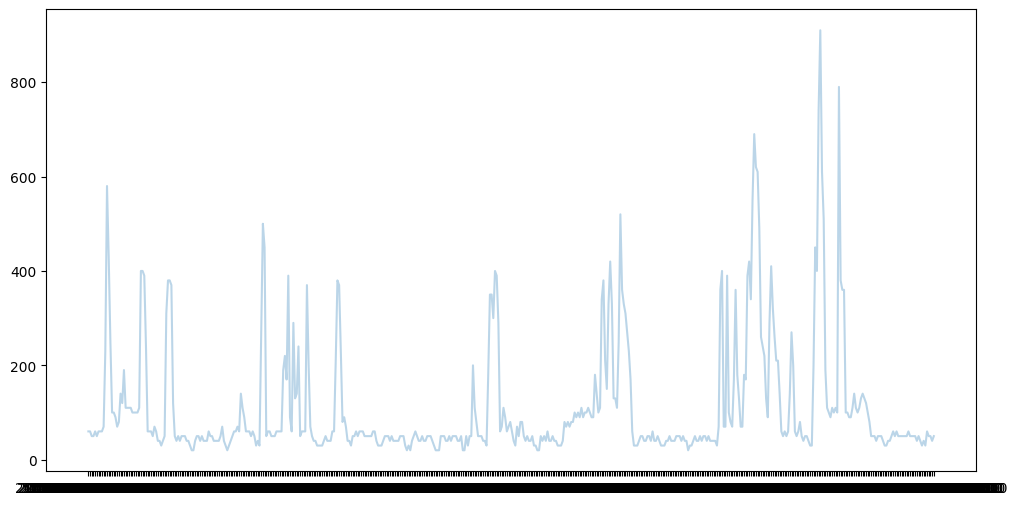

In [ ]:
# visa grafen efter rensning
plt.figure(figsize=(12,6))

plt.plot(df['Datum_Tid'].head(500),
         df['Vitvaror_Energi_Wh'].head(500),
         label='Rådata', alpha=0.3)

plt.plot(df['Datum_Tid'].head(500),
         df['Vitvaror_Energi_Wh'].mean().head(500),
         label='Rullande medelvärde', linewidth=2)

plt.xlabel('Tid')
plt.ylabel('kWh')
plt.title('Energiförbrukning – efter datarensning')
plt.legend()

# Fix för x-axeln:
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Max 10 etiketter
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
